<!-- ## **Часть 3. Анализ результатов кластеризации** -->

In [1]:
import pandas as pd 
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,RobustScaler
from scipy.stats import shapiro,levene,kruskal,f_oneway, ttest_ind
import pickle
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV,StratifiedKFold,cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import pickle
import warnings
warnings.filterwarnings('ignore')

## **Описание датасета**

Со всех исходных датасетов, мной был взят средний показатель за 2017 - 2021, либо за 2017 - 2020 года

1. **child_mortality** - коэффициент детской смертности, число детей, умерших в возрасте до 1 года, на 1000 родившихся 
2. **new_born** - Коэффициент рождаемости на 1000 человек
3. **crime** - коэффициент числа совершенных преступлений на 1000 человек
4. **disable** - доля инвалидов на 1000 человек
5. **morbidity** - Заболеваемость на 1000 человек населения
6. **poverty_percent** - Процент людей, живущих за чертой бедности (с денежными доходами ниже величины прожиточного минимума)
7. **welfare_expense_share** - Расходы на социальную политику от общих расходов бюджета региона, %
8. **per_capita** - Среднедушевые денежные доходы 
9. **real_income** - Реальные денежные доходы, в процентах
10. **formal_wage_paid** - Среднемесячная номинальная начисленная заработная плата,в процентах
11. **real_pay** - Реальная начисленная заработная плата, в процентах
12. **poor_children** - процент детей среди малообеспеченного населения
13. **poor_pensioners** - процент пенсионеров среди малообеспеченного населения
14. **poor_employable** - процент людей трудоспособного возраста среди малообеспеченного населения
15. **Living_Area_Per_Member** - Размер жилой площади в расчете на члена домохозяйства
16. **Poor_Condition** - домохозяйства, указавшие на плохое состояние жилья
17. **grp** - Валовой региональный продукт на душу населения, в рублях
18. **self-produced_good** - доля отгруженных товаров собственного производства
19. **retail** - розничная торговля на душу населения, в рублях
20. **drugs** - количество впервые зарегистрированных наркотических психозов на 100 тыс. населения
21. **alcoholism** - количество впервые зарегистрированных алкогольных психозов на 100 тыс. населения
22. **workers**	- Отношение числа занятых в экономике региона к численности населения региона в трудоспособном возрасте, %
23. **population** - численность населения по регионам, тыс.человек
24. **pension_for_old** - пенсия по возрассту 
25. **social_pension** - социальные пенсии
26. **number_of_children** - процент детей среди всего населения
27. **number_of_pensioners** - процент пенсионеров среди всего населения
28. **number_able_bodied** - процент трудоспособного населения среди всего населения
29. **without_work**  - процент безработных
30. **housing_amenities**  - Доля площади жилищного фонда, обеспеченного всеми видами благоустройства, в общей площади жилищного фонда субъекта Российской Федерации

In [2]:
df = pd.read_csv('social_russia_data/combined_data_clusters.csv', index_col='region')
df.head()

,child_mortality,new_born,crime,disable,morbidity,poverty_percent,welfare_expense_share,per_capita,real_income,formal_wage_paid,...,workers,population,pension_for_old,social_pension,number_of_children,number_of_pensioners,number_able_bodied,without_work,housing_amenities,Cluster
region,,,,,,,,,,,,,,,,,,,,,
Алтайский край,5.925577,9.684144,13.557762,78.081054,10279.519,17.500,29.675,28.245256,98.700,25.392791,...,80.28,2249702.2,53.588624,60.588031,19.00,27.10,53.90,6.90,48.258,1
Амурская область,5.189191,10.527970,14.957814,83.642497,8827.875,15.800,23.700,39.262151,101.375,42.843765,...,85.58,786499.2,59.586169,63.878776,20.36,22.74,56.92,10.06,56.072,1
Архангельская область,4.804384,9.755237,12.207066,80.293641,0.000,13.550,23.200,42.203318,99.900,47.677655,...,82.86,1073211.2,71.433200,65.403830,18.86,26.36,54.78,8.38,53.394,1
Астраханская область,5.745307,11.484550,10.107269,44.347703,6430.322,15.425,27.825,29.449429,98.875,33.015931,...,83.10,987793.2,52.022575,60.150396,20.44,24.14,55.42,9.18,60.582,1
Белгородская область,4.274276,8.661739,5.203893,133.451369,8218.121,7.575,15.475,38.458353,99.125,31.766072,...,87.76,1551543.4,57.632456,55.896248,16.84,27.56,55.60,3.28,78.668,1


In [3]:
df['Cluster'].value_counts()

Cluster
1    63
2    11
0    11
Name: count, dtype: int64

In [4]:
def plot_cluster_profile(grouped_data):
    # Нормализуем сгруппированные данные, приводя их к масштабу 0-1.
    scaler = MinMaxScaler()
    grouped_data = pd.DataFrame(scaler.fit_transform(grouped_data), columns=grouped_data.columns)
    # Создаем список признаков
    features = grouped_data.columns
    # Создаем пустую фигуру
    fig = make_subplots(rows=1, cols=3, specs=[[{'type': 'polar'}]*3]*1)

    fig.add_trace(go.Scatterpolar(
      name = "cluster 0",
      r = grouped_data.loc[0].values,
      theta = features
    ), 1, 1)
    
    fig.add_trace(go.Scatterpolar(
      name = "cluster 1",
      r = grouped_data.loc[1].values,
      theta = features
    ), 1, 2)

    fig.add_trace(go.Scatterpolar(
      name = "cluster 2",
      r = grouped_data.loc[2].values,
      theta = features
    ), 1, 3)
    
    fig.update_traces(fill='toself')
    
    fig.update_layout(
        showlegend=True, # отображение легенды
        autosize=False, # устаналиваем свои размеры графика
        width=1300, # ширина (в пикселях)
        height=400,
        legend=dict(
        y=1.4, # Поднимаем выше
        x=0.9,    # Привязка слева
        xanchor="left", # Явно указываем привязку слева
        yanchor="bottom" # Привязка снизу (относительно указанного y)
    ),# высота (в пикселях)
      
      polar = dict(
      radialaxis_angle = -45,
      angularaxis = dict(
        direction = "clockwise",
        period = 6)),
      
      polar2 = dict(
      radialaxis_angle = -45,
      angularaxis = dict(
        direction = "clockwise",
        period = 6)),
      
      polar3 = dict(
      radialaxis_angle = -45,
      angularaxis = dict(
        direction = "clockwise",
        period = 6))
    
    )
    
    fig.write_image("my_graph.png")
    # Отображаем фигуру
    fig.show()

Отберем экономические и некоторые социальные параметры, чтобы сравнить кластеры между собой

In [5]:
economical_data = df[['poverty_percent', 'welfare_expense_share', 'per_capita', 'real_income',
                  'formal_wage_paid', 'real_pay','grp','retail','pension_for_old','social_pension',
                  'poor_children','poor_pensioners','poor_employable','Cluster']]

grouped_data = economical_data.groupby('Cluster').median()

In [6]:
plot_cluster_profile(grouped_data)

**Кластер 0** - в данынй кластер входят регионы, у которых нет проблем с ВРП, среднедушевыми доходами, пенсиями, отстутствует население, проживающее за чертой бедности, а также нет расходов на социальную политику. Однако имеется высокий процент детей среди малообеспеченного населения.

Туда входят Москва, а также те регионы, а также промышленные регионы страны

In [58]:
list(df[df['Cluster'] ==0].index)

['Камчатский край',
 'Магаданская область',
 'Москва',
 'Мурманская область',
 'Ненецкий автономный округ',
 'Республика Саха (Якутия)',
 'Сахалинская область',
 'Тюменская область',
 'Ханты-Мансийский автономный округ',
 'Чукотский автономный округ',
 'Ямало-Ненецкий автономный округ']

**Кластер 1** - туда входят большинство регионов, со средними доходами населения. Характерно то, что имеются расходы на социальную политику и процент, пусть и не критичный, населения, живущего за чертой бедности. В данном кластере высокий процент людей трудоспособного возраста среди малообеспеченного населения

In [59]:
df[df['Cluster'] ==1].index.values

array(['Алтайский край', 'Амурская область', 'Архангельская область',
       'Астраханская область', 'Белгородская область', 'Брянская область',
       'Владимирская область', 'Волгоградская область',
       'Вологодская область', 'Воронежская область',
       'Еврейская автономная область', 'Ивановская область',
       'Иркутская область', 'Калининградская область',
       'Калужская область', 'Кемеровская область', 'Кировская область',
       'Костромская область', 'Краснодарский край', 'Красноярский край',
       'Курганская область', 'Курская область', 'Ленинградская область',
       'Липецкая область', 'Московская область', 'Нижегородская область',
       'Новгородская область', 'Новосибирская область', 'Омская область',
       'Оренбургская область', 'Орловская область', 'Пензенская область',
       'Пермский край', 'Приморский край', 'Псковская область',
       'Республика Адыгея', 'Республика Башкортостан',
       'Республика Карелия', 'Республика Коми', 'Республика Крым',
    

**Кластер 2** - туда входят 'бедные' регионы. Характерен высокий процент населения, живущего за чертой бедности, высокие расходы на социальную политику. В данном клстере высокий процент пенсионеров среди малообеспеченного населения

In [60]:
df[df['Cluster'] ==2].index.values

array(['Забайкальский край', 'Кабардино-Балкарская Республика',
       'Карачаево-Черкесская Республика', 'Республика Алтай',
       'Республика Бурятия', 'Республика Дагестан',
       'Республика Ингушетия', 'Республика Калмыкия', 'Республика Тыва',
       'Северная Осетия', 'Чеченская Республика'], dtype=object)

**Анализ кластеров**

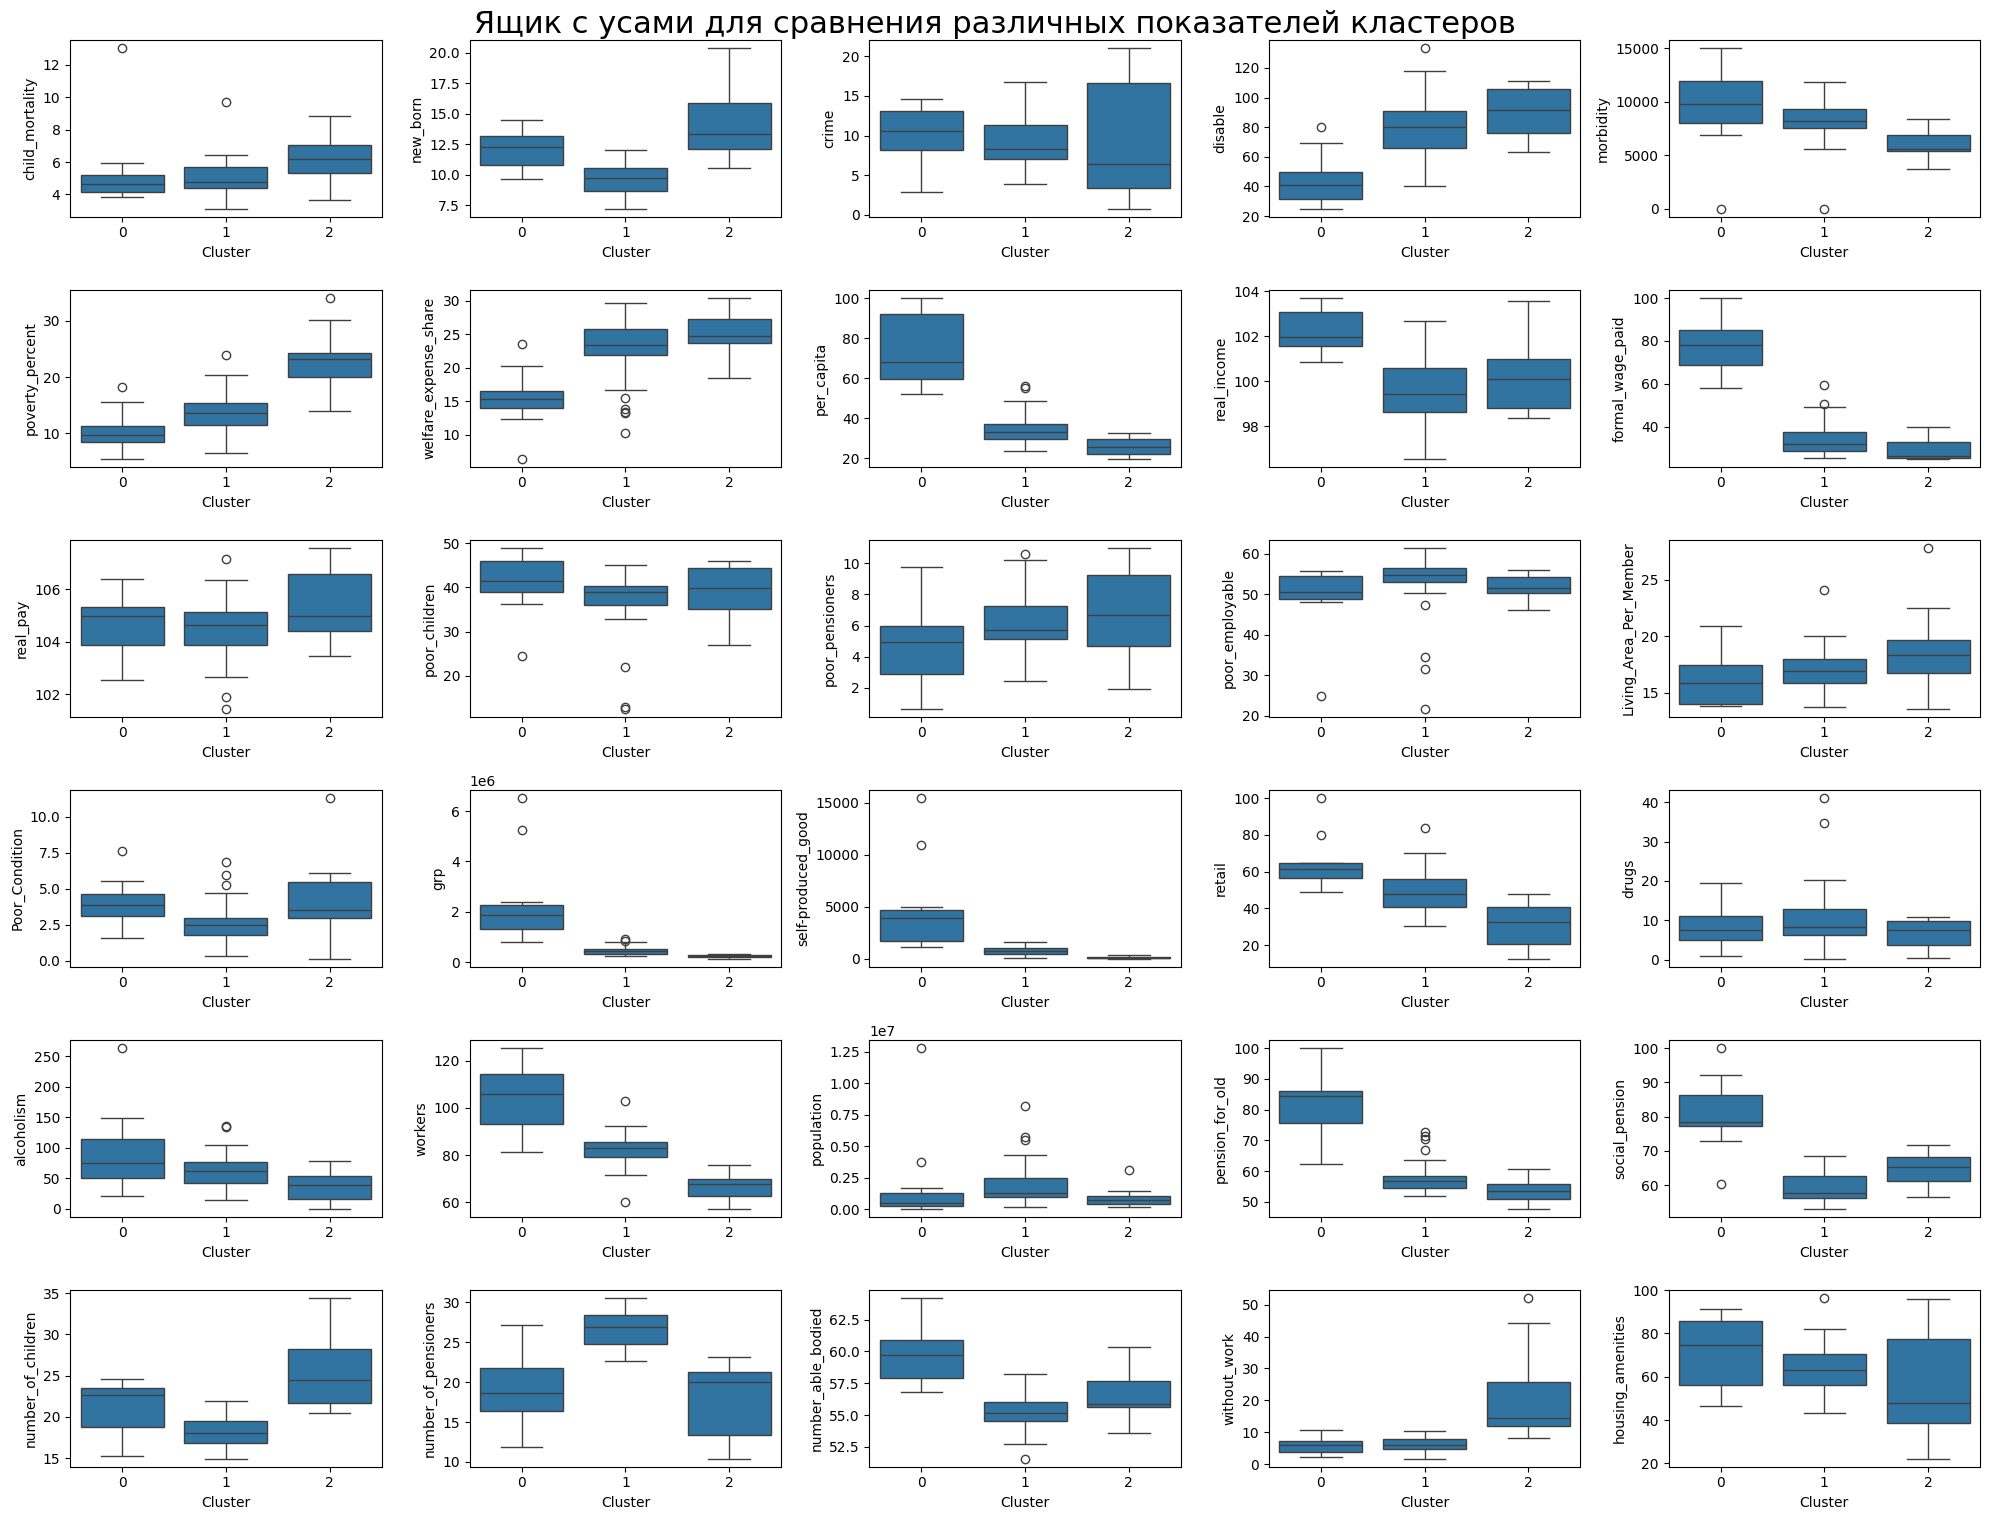

In [61]:
rows = 6
cols= 5

box_data = df.copy()

fig,axes = plt.subplots(rows,cols,figsize=(20,15))
axes = axes.flatten()

for i,col in enumerate(box_data.columns[:-1]):
    sns.boxplot(data=box_data,x='Cluster',y=col,ax=axes[i])
plt.tight_layout()
plt.suptitle('Ящик с усами для сравнения различных показателей кластеров',fontsize=22,x=0.5,y=1.01)
plt.show()

Согласно графическому анализу "ящика с усами" для 0 кластера (зажиточных регионов) характерны высокие распределения по различным экономическим показателям (среднедушевые денежные доходы, реальные денежные доходы, низкий процент населения, живущих за чертой бедности, среднемесячная номинальная начисленная заработная плата, врп, доля отгруженных товаров собственного производства, розничная торговля на душу населения, пенсиям, низкой безработицы и.т.д)

По социальным показателям не все так одназначно: медианное количество преступления превышает медианное количество  в других кластерах, заболеваемость превышает заболеваемости в других кластерах, процент малообеспеченных детей, пенсионеров, трудоспособных практически не отличается от таких же показателей. Размер жилой площади в расчете на члена домохозяйства в медианном значении чуть меньше медиан этого же показателя в других кластерах. Показатели наркомании и алкоголизма ни чем не отличаются от этих же показателей в дркгих кластерах. 

Для 3 кластера (бедных регионов) помимо низких экономических показателей характерны повышенная детская смертность вместе с тем и высокая рождаемость, высокая доля инвалидов, высокий процент количества детей.  

Для тех показателей, где визуально трудно однозначно сказать, где какой показатель для какого кластера привалирует, будут проведены статистические тесты, а именно для признаков: 'Реальная начисленная заработная плата в процентах','Процент детей среди малообеспеченного населения','Процент пенсионеров среди малообеспеченного населения', 'Процент людей трудоспособного возраста среди малообеспеченного населения','Размер жилой площади в расчете на члена домохозяйства','Домохозяйства, указавшие на плохое состояние жилья', 'Количество впервые зарегистрированных наркотических психозов на 100 тыс. населения',
'Количество впервые зарегистрированных алкогольных психозов на 100 тыс. населения'.

In [62]:
columns = ['real_pay','poor_children','poor_pensioners','poor_employable','Living_Area_Per_Member','Poor_Condition',
           'drugs','alcoholism']


Поскольку групп больше чем две, будет использоваться тест однофакторного дисперсионного анализа (ANOVA), если признаки по группам распределены нормально и дисперсии в группах равны, если одно из двух выполняться не будет, то будет использоваться Критерий Краскела-Уоллиса.Нулевой гипотезой будет, то что разница в  значениях в трех кластерах статистически не значима.

 $ H_0 : μ_1 = μ_2 = μ_3$

Альтернативной будет гипотеза, то что в группах статистически значима и показатели в кластерах разные

 $H_1 : μ_1 \neq μ_2 \neq μ_3$

In [63]:
def make_stat_test(data,feature,alpha=0.05):
    cluster_zero = data.loc[data['Cluster']==0,feature]
    cluster_one = data.loc[data['Cluster']==1,feature]
    cluster_two = data.loc[data['Cluster']==2,feature]
    
    p1 = shapiro(cluster_zero)[1]
    p2 = shapiro(cluster_one)[1]
    p3 = shapiro(cluster_two)[1]
    
    norm_result = (p1<=alpha,p2<=alpha,p3<=alpha)
    levene_result = levene(cluster_zero,cluster_one,cluster_two)
    
    if True in norm_result or levene_result[1] <= alpha:
        print('Поскольку признаки не распределены нормально или дисперсии не равны, был использован Критерий Краскела-Уолеса')
        p = kruskal(cluster_zero, cluster_one, cluster_two)[1]    
      
    else:
         print('Поскольку признаки нормально распределены и дисперсии равны был использован тест ANOVA')
         p = f_oneway(cluster_zero, cluster_one, cluster_two)[1]
    
    if p <= alpha:
        return f'p-значение {round(p,3)} меньше, чем заданный уровень значимости.Отвергаем нулевую гипотезу.Неравенство статистически значима в группах'
    else:
        return f'p-значение {round(p,3)} больше, чем заданный уровень значимости. У нас нет оснований отвергнуть нулевую гипотезу.Неравенство статистически незначима в группах'

In [64]:
for col in columns:
    print(f'Для признака {col}:')
    print(make_stat_test(df,col))
    print('______________________________')

Для признака real_pay:
Поскольку признаки нормально распределены и дисперсии равны был использован тест ANOVA
p-значение 0.044 меньше, чем заданный уровень значимости.Отвергаем нулевую гипотезу.Неравенство статистически значима в группах
______________________________
Для признака poor_children:
Поскольку признаки не распределены нормально или дисперсии не равны, был использован Критерий Краскела-Уолеса
p-значение 0.063 больше, чем заданный уровень значимости. У нас нет оснований отвергнуть нулевую гипотезу.Неравенство статистически незначима в группах
______________________________
Для признака poor_pensioners:
Поскольку признаки не распределены нормально или дисперсии не равны, был использован Критерий Краскела-Уолеса
p-значение 0.09 больше, чем заданный уровень значимости. У нас нет оснований отвергнуть нулевую гипотезу.Неравенство статистически незначима в группах
______________________________
Для признака poor_employable:
Поскольку признаки не распределены нормально или дисперсии

Статистически значимы следующие показатели: 
- 'real_pay' (Реальные денежные доходы, в процентах,в кластере 2 по графику она чуть выше, чем других кластерах)
- 'poor_employable'(процент людей трудоспособного возраста среди малообеспеченного населения,по графику в кластере 1 процент больше)
- 'Poor_Condition' (домохозяйства, указавшие на плохое состояние жилья,во втором кластере 2 их чуть больше), 
- 'alcoholism' (количество впервые зарегистрированных алкогольных психозов на 100 тыс. населения,в кластере 0, количество больше по графику)

**Подробный анализ социально-неблагополучного населения по кластерам и по регионам**

Поскольку однозначно определить в каких кластерах преобладают дети, пенсионеры, трудоспособных среди населения, проживающих за чертой бедности (признаки poor_children,poor_pensioners,poor_employable), однозначно не удалось ни графически, ни статистически, можно воспользоваться признаком 'poverty_percent' (Процент людей, живущих за чертой бедности (с денежными доходами ниже величины прожиточного минимума)) и сделать сравнение по нему.

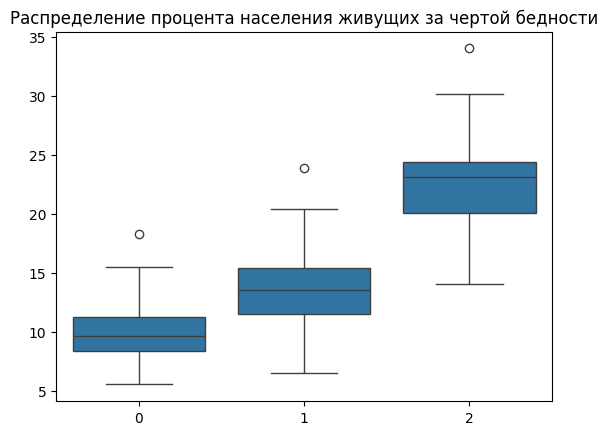

In [65]:
sns.boxplot(data=df,x='Cluster',y='poverty_percent')
plt.title('Распределение процента населения живущих за чертой бедности')
plt.xlabel('')
plt.ylabel('')
plt.show()

Видно, что второй кластер - лидер антирейтинга по уровню бедности. Подтвердим, эти различия статистически. Возьмем только 2 группы кластер 1 и кластер 2
Сравним к примеру показатель первого кластера и второго с помощью двухвыборочного t-критерий (t-test), если признаки по кластерам нормально распределены и дисперсии одинаковы, или Критерий Манна-Уитни, если признак распределен не нормально.


In [66]:
poverty_one_cluster = df.loc[df['Cluster']==1,'poverty_percent']
poverty_two_cluster = df.loc[df['Cluster']==2,'poverty_percent']

In [67]:
def stats_shapiro(data,alpha=0.05):
    p = shapiro(data)[1]

    print('p-value = %.3f' % (p))

    # интерпретируем результат
    if p <= alpha:
        print('Распределение не нормальное')
    else:
        print('Распределение нормальное')
        
        
def stats_levene(data_one,data_two,alpha=0.05):
    result = levene(data_one, data_two)
    p = result[1]
    print('p-value = {:.3f}'.format(p))

    # интерпретируем результат
    if p <= alpha:
        print('Дисперсии не одинаковы')
    else:
        print('Дисперсии одинаковы')

In [17]:
stats_shapiro(poverty_one_cluster)

p-value = 0.396
Распределение нормальное


In [68]:
stats_shapiro(poverty_two_cluster)

p-value = 0.617
Распределение нормальное


In [69]:
stats_levene(poverty_one_cluster,poverty_two_cluster)

p-value = 0.050
Дисперсии одинаковы


Поскольку признак распределен нормально и дисперсии равны будет использован двухвыборочный t-критерий для сравнения средних значений, с параметром equal_var=True 

Нулевая гипотеза: средний показатель процента населения за чертой бедности кластера 1 ($\mu_1$) меньше или равно среднему показателю процента кластера 2 ($\mu_2$).

$H_0 : \mu_1 \leq \mu_2$

Альтернативная гипотеза: средний показатель кластера 1 ($\mu_1$) больше среднего впоказателя кластера 2 ($\mu_2$)

$H_1 : \mu_1 > \mu_2$

In [70]:
alpha =0.05
p = ttest_ind(poverty_one_cluster, poverty_two_cluster, alternative='greater', equal_var=True)[1]

print('p-value = {:.3f}'.format(p))

# интерпретируем результат
if p <= alpha:
    print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу.'.format(alpha))
else:
    print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))


p-value = 1.000
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


Кластер 2 подтверждает, что имеет большой процент людей, живущих за чертой бедности (с денежными доходами ниже величины прожиточного минимума),следовательно, остро нуждаются в помощи малообеспеченным/неблагополучным
слоям населения. Напомню, в этот кластер входят регионы Северного Кавказа и некоторые регионы Дальнего Востока

**Описание группы населения, сталкивающиеся с бедностью**

Еще раз стоит проанализировать распределения процента групп населения сталкивающихся с бедностью 

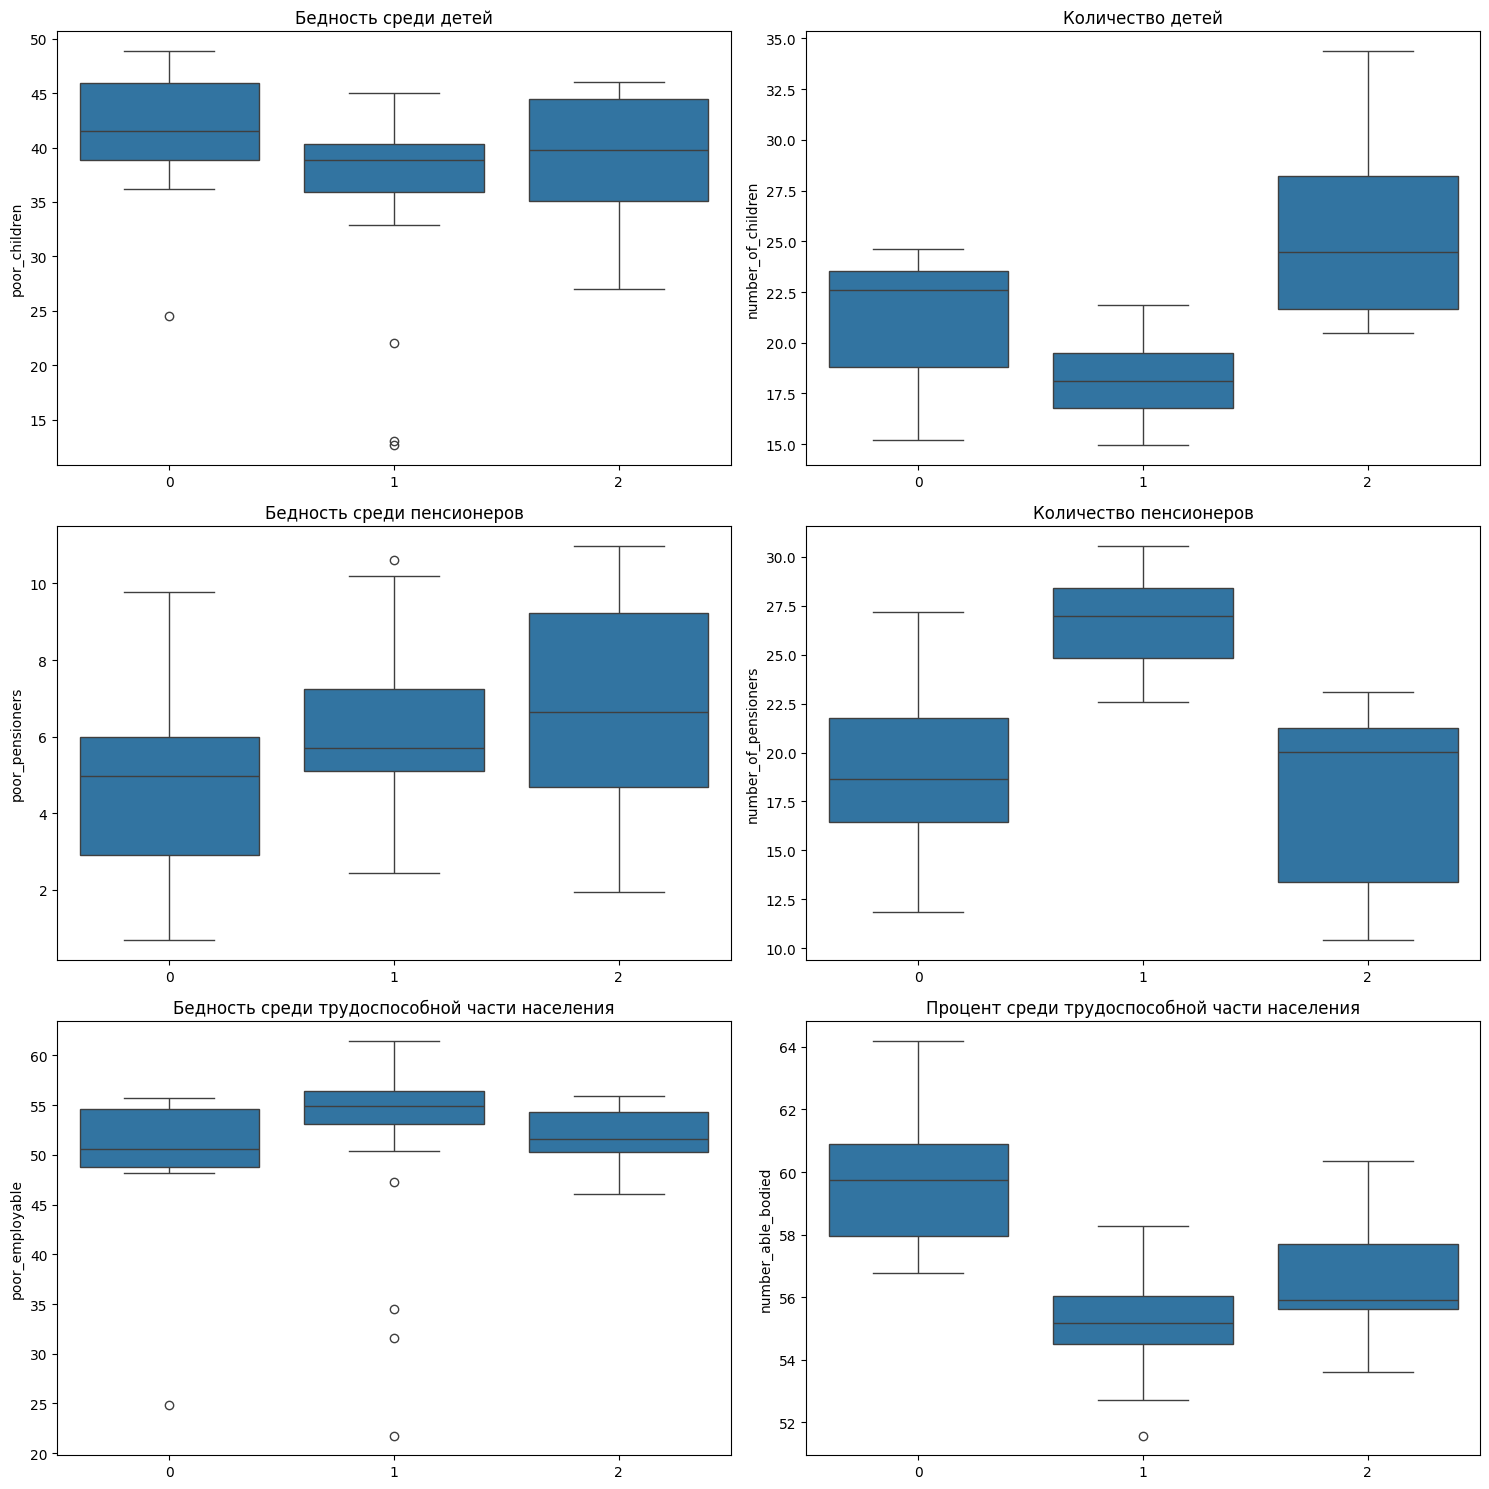

In [71]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15)) # 1 строка, 2 столбца

sns.boxplot(x='Cluster', y='poor_children', data=df, ax=axes[0,0]) 
axes[0,0].set_title('Бедность среди детей')
axes[0,0].set_xlabel('')


sns.boxplot(x='Cluster', y='number_of_children', data=df, ax=axes[0,1])
axes[0,1].set_title('Количество детей')
axes[0,1].set_xlabel('')


sns.boxplot(x='Cluster', y='poor_pensioners', data=df, ax=axes[1,0]) 
axes[1,0].set_title('Бедность среди пенсионеров')
axes[1,0].set_xlabel('')


sns.boxplot(x='Cluster', y='number_of_pensioners', data=df, ax=axes[1,1])
axes[1,1].set_title('Количество пенсионеров')
axes[1,1].set_xlabel('')



sns.boxplot(x='Cluster', y='poor_employable', data=df, ax=axes[2,0]) 
axes[2,0].set_title('Бедность среди трудоспособной части населения')
axes[2,0].set_xlabel('')


sns.boxplot(x='Cluster', y='number_able_bodied', data=df, ax=axes[2,1])
axes[2,1].set_title('Процент среди трудоспособной части населения')
axes[2,1].set_xlabel('')
plt.tight_layout() #Чтобы графики не перекрывались



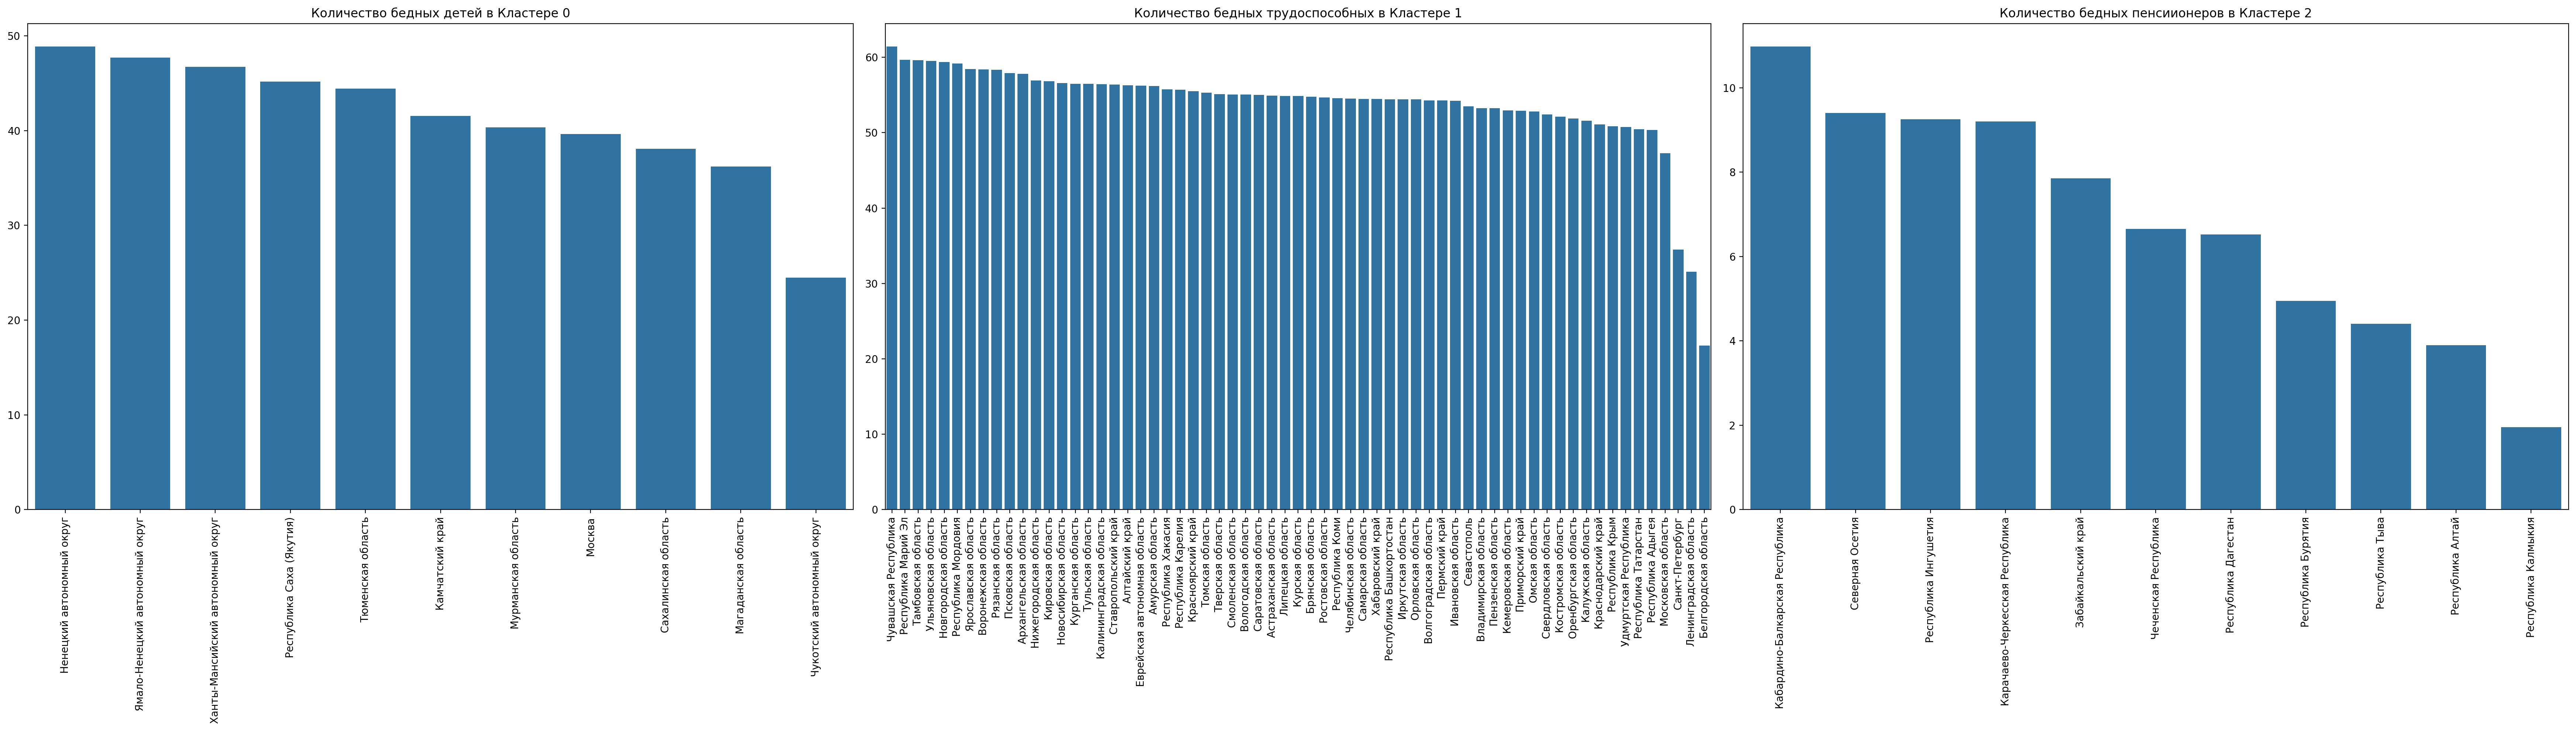

In [72]:
# Фильтрация и сортировка данных по кластерам и целевым показателям:
poor_children = df[df['Cluster']==0].sort_values(by='poor_children',ascending=False)
poor_employable = df[df['Cluster']==1].sort_values(by='poor_employable',ascending=False)
poor_pensioners = df[df['Cluster']==2].sort_values(by='poor_pensioners',ascending=False)

fig,axes=plt.subplots(1,3,figsize=(35,10),dpi=200)

# Построение диаграммы для бедных детей (Кластер 0):
sns.barplot(data = poor_children,x=poor_children.index,y='poor_children',ax=axes[0])
axes[0].set_xticklabels(labels=poor_children.index,rotation=90) # Поворот меток оси X для читаемости
axes[0].set_xlabel('') # Убираем метку оси X
axes[0].set_ylabel('') # Убираем метку оси Y
axes[0].set_title('Количество бедных детей в Кластере 0') # Заголовок диаграммы

# Построение диаграммы для бедных трудоспособных (Кластер 1):
sns.barplot(data = poor_employable,x=poor_employable.index,y='poor_employable',ax=axes[1])
axes[1].set_xticklabels(labels=poor_employable.index,rotation=90)
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].set_title('Количество бедных трудоспособных в Кластере 1')

# Построение диаграммы для бедных пенсионеров (Кластер 2):
sns.barplot(data = poor_pensioners,x=poor_pensioners.index,y='poor_pensioners',ax=axes[2])
axes[2].set_xticklabels(labels=poor_pensioners.index,rotation=90)
axes[2].set_xlabel('')
axes[2].set_ylabel('')
axes[2].set_title('Количество бедных пенсиионеров в Кластере 2')

# Настройка расположения подграфиков:
plt.tight_layout() 
plt.show() 


In [73]:
corr_df = df.corr(method='spearman')
corr_df = corr_df.loc[['poor_children','poor_pensioners','poor_employable','poverty_percent']]

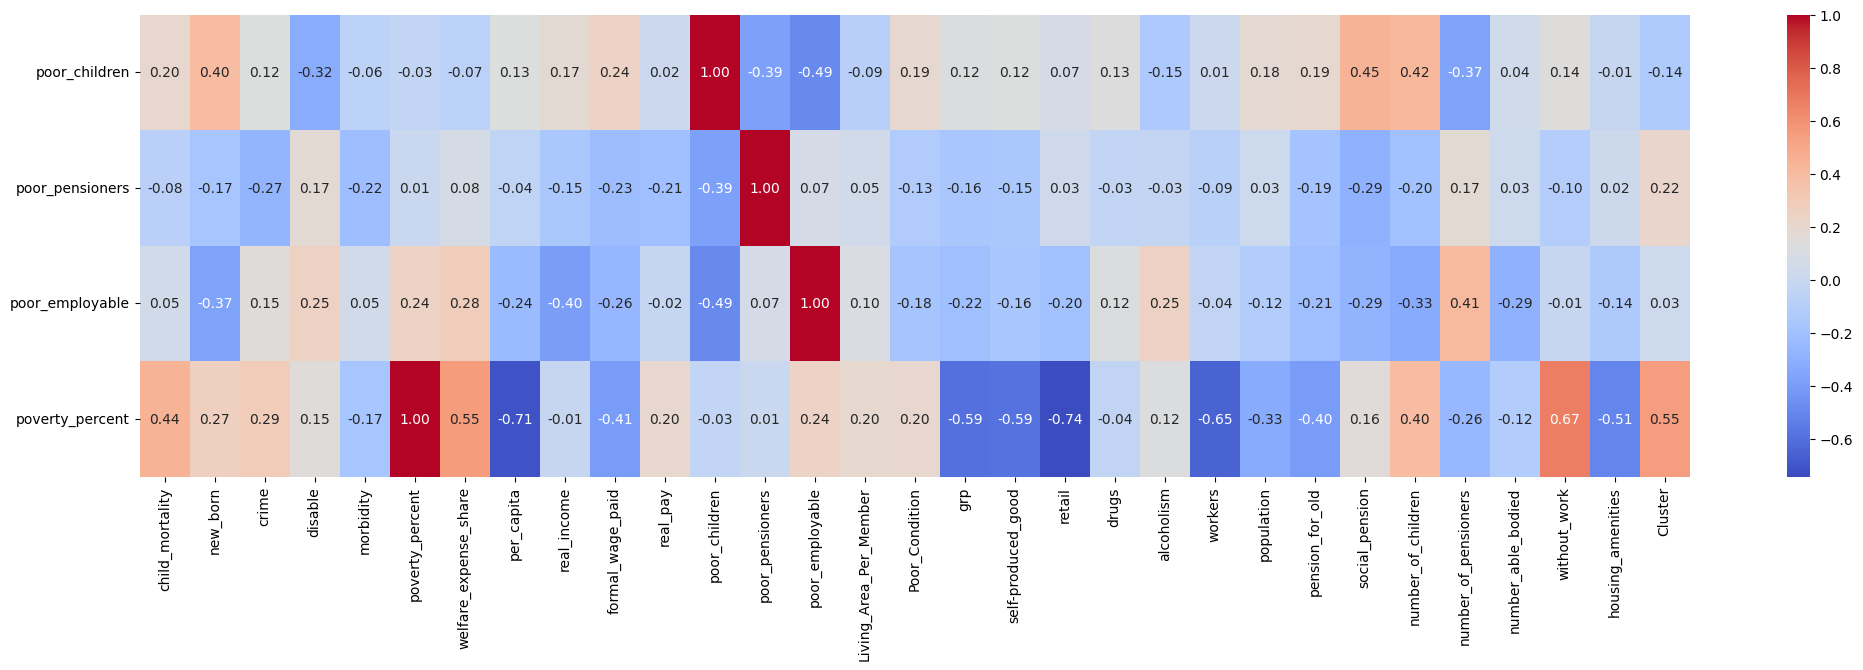

In [74]:
plt.figure(figsize=(25,6))
sns.heatmap(corr_df,annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [75]:
df.corr(method='spearman').loc['poverty_percent'].reset_index().iloc[[25,26,27]]

,index,poverty_percent
25,number_of_children,0.40097
26,number_of_pensioners,-0.25827
27,number_able_bodied,-0.11847


Наиболее заметная связь наблюдается между уровнем бедности и долей детей в регионе. Большая доля детей связана с более высоким уровнем бедности. Доля пенсионеров и трудоспособного населения также связаны с уровнем бедности, но эта связь обратная (чем больше этих групп, тем, как правило, меньше бедность) и более слабая.

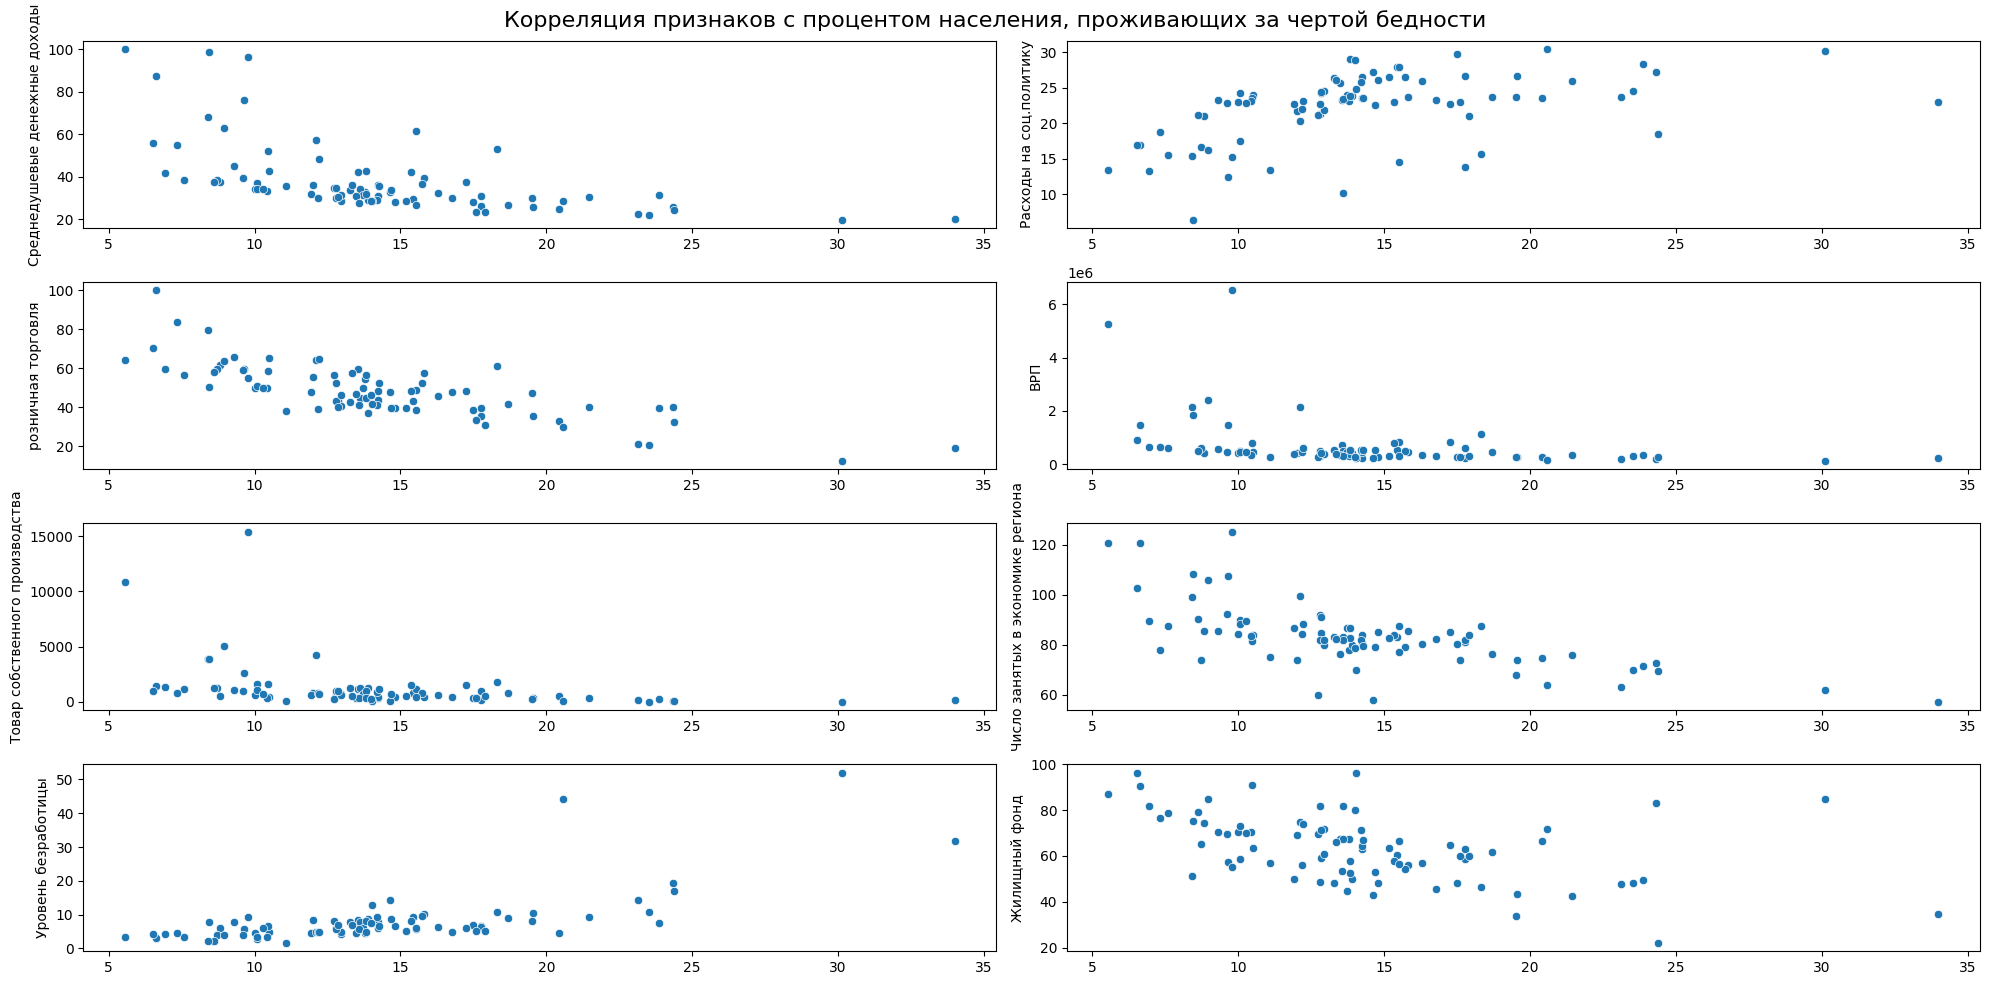

In [76]:
fig,axes =plt.subplots(4,2,figsize=(20,10))
plt.suptitle('Корреляция признаков с процентом населения, проживающих за чертой бедности',fontsize=16)
sns.scatterplot(data=df,x='poverty_percent',y='per_capita',ax=axes[0,0])
axes[0,0].set_xlabel('')
axes[0,0].set_ylabel('Среднедушевые денежные доходы')
sns.scatterplot(data=df,x='poverty_percent',y='welfare_expense_share',ax=axes[0,1])
axes[0,1].set_xlabel('')
axes[0,1].set_ylabel('Расходы на соц.политику')
sns.scatterplot(data=df,x='poverty_percent',y='retail',ax=axes[1,0])
axes[1,0].set_ylabel('розничная торговля')
axes[1,0].set_xlabel('')
sns.scatterplot(data=df,x='poverty_percent',y='grp',ax=axes[1,1])
axes[1,1].set_xlabel('')
axes[1,1].set_ylabel('ВРП')
sns.scatterplot(data=df,x='poverty_percent',y='self-produced_good',ax=axes[2,0])
axes[2,0].set_xlabel('')
axes[2,0].set_ylabel('Товар собственного производства')
sns.scatterplot(data=df,x='poverty_percent',y='workers',ax=axes[2,1])
axes[2,1].set_xlabel('')
axes[2,1].set_ylabel('Число занятых в экономике региона')
sns.scatterplot(data=df,x='poverty_percent',y='without_work',ax=axes[3,0])
axes[3,0].set_xlabel('')
axes[3,0].set_ylabel('Уровень безработицы')
sns.scatterplot(data=df,x='poverty_percent',y='housing_amenities',ax=axes[3,1])
axes[3,1].set_xlabel('')
axes[3,1].set_ylabel('Жилищный фонд')
plt.tight_layout()
plt.show()

Таким образом сильную корреляционную связь уровень бедности имеет с признаками :
-  welfare_expense_share (0.551671): регионы с высокой бедностью вынуждены тратить больше на социальную помощь, или же, что неэффективные программы социальной помощи не снижают уровень бедности, а лишь увеличивают расходы.
-  without_work (0.671159): Достаточно сильная положительная корреляция. Это логично: чем выше уровень безработицы в регионе, тем выше и уровень бедности, так как люди без работы лишены основного источника дохода. 
-  per_capita (-0.710978): Сильная отрицательная корреляция. Чем выше доход на душу населения, тем ниже уровень бедности — это ожидаемая и логичная связь.
- formal_wage_paid (-0.406365): Умеренно сильная отрицательная корреляция.  Чем выше уровень официальных зарплат, тем меньше людей живут за чертой бедности. Это также вполне логично.
- grp (-0.593552): Сильная отрицательная корреляция. Чем выше ВРП, тем ниже бедность.
- self-produced_good (-0.587181): Высокий уровень производства также отрицательно влияет на бедность
-  retail (-0.742374): Очень сильная отрицательная корреляция. Высокий объем розничной торговли обычно связан с более высоким уровнем экономического развития и доходов населения, что приводит к снижению бедности.
- housing_amenities (-0.507053): Умеренно сильная отрицательная корреляция. Чем лучше жилищные условия, тем ниже уровень бедности. Это может быть связано как с тем, что более обеспеченные люди могут позволить себе лучшее жилье, так и с тем, что качественное жилье способствует улучшению качества жизни и повышению доходов.

In [77]:
def make_barplot(data,feature,**kwargs):
    '''Функция для отрисовки столбчатой диаграммы'''
    data = data.sort_values(by=feature,ascending=False)
    plt.figure(figsize=(12,6))
    sns.barplot(data = data,x=data.index,y=feature,palette='viridis')
    plt.xlabel(kwargs.get('xlabel'))
    plt.ylabel(kwargs.get('ylabel'))
    plt.title(kwargs.get('title'))
    plt.xticks(rotation=90,fontsize=8)
    plt.show()

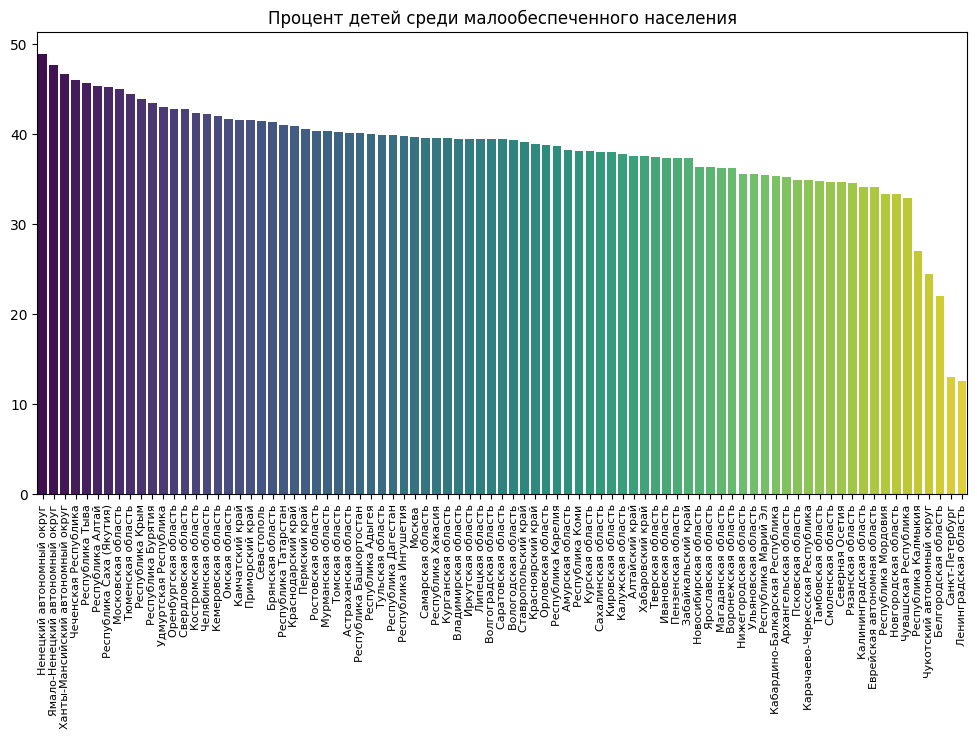

In [78]:
make_barplot(df,'poor_children',title='Процент детей среди малообеспеченного населения')

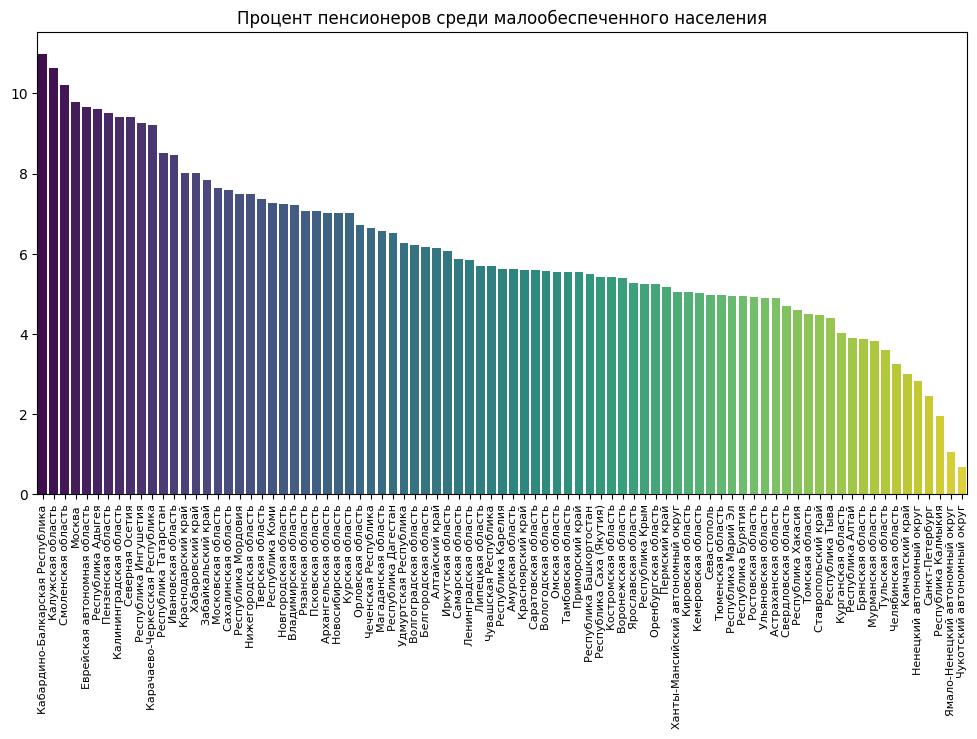

In [79]:
make_barplot(df,'poor_pensioners',title='Процент пенсионеров среди малообеспеченного населения')

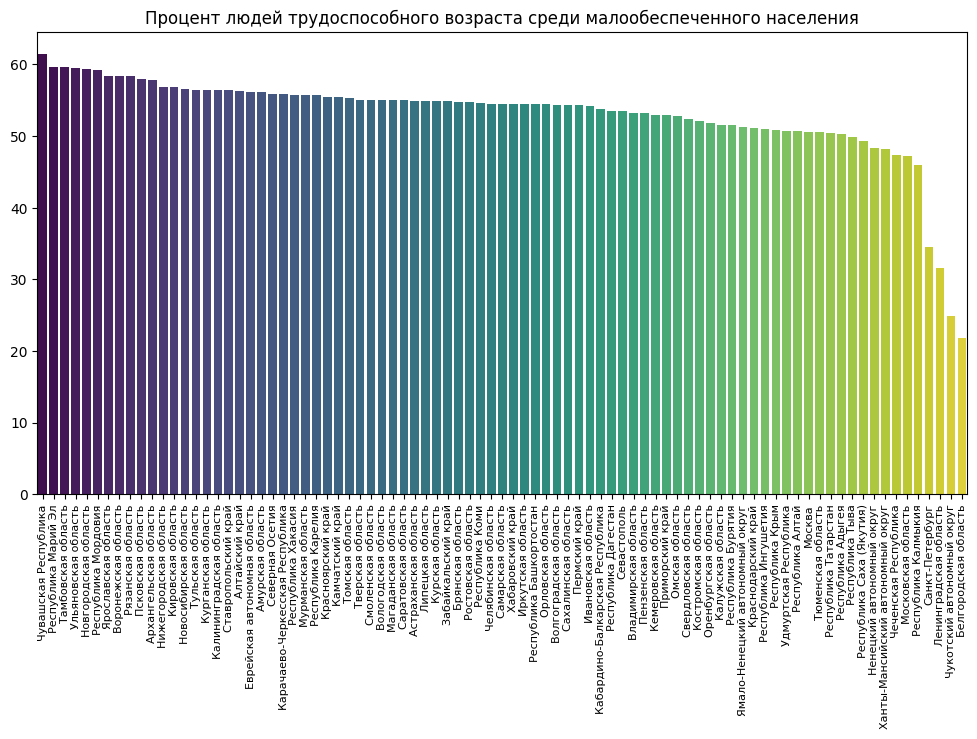

In [80]:
make_barplot(df,'poor_employable',title='Процент людей трудоспособного возраста среди малообеспеченного населения')

Вывод по анализу: 

- как уже отмечалось ранее, процент населения, находящегося за чертой бедности сосредочен кластере 2 (подтверждается статистически и графически),туда входят республики Северного Кавказа и некоторые регионы Дальнего Востока;
- по признакам бедных детей ('poor_children'),бедных пенсионеров ('poor_pensioners') и бедных трудноспособных ('poor_employable') нужно отметить, что статистически значимого различия по этим признакам в кластерах, в целом не наблюдается, и значения этих признаков между кластерами "размыты" и они не служили главным образом основными признаками деления по кластерам. Например, 'рабочие' регионы, такие как Ямало-Ненецкий автономный округ, Ненецкий автономный округ, Ханты-Мансийский автономный округ попали в 0 кластер, то есть в кластер "зажиточных регионов", однако в данных регионах наблюдается проблема с процентом бедных детей, а в кластере 2 , кластере 'неблагополучных регионов', несмотря, на большой процент детей, уровень бедности среди детей, не очень большой.
- На вопрос "влияет ли число детей, пенсионеров и других социально уязвимых групп на уровень бедности в регионе" отвечает корреляционный анализ количества детей, пенсионеров и трудоспособных людей в регионах. Умеренная связь подтверждается только с **количеством детей**, с остальными признаками уровень бедности никак не коррелирует. 
- уровень бедности/социального неблагополучия **связаны** с производством и потреблением, что также подтвержадется корреляционным и графическими анализами, а именно с Валовым региональным продуктом, с объемом розничной торговли на душу населения, с долей отгруженных товаров собственного производства


## **Обучение модели классификации** 

Для дальнейшего создания ml-сервиса для предсказания кластеров на основе определнных данных, считаю необходимым перевести задачу кластеризации в задачу классификации. 

In [81]:
#Разделим датасет на признаки и целевую переменную
X = df.drop('Cluster', axis=1)
y = df['Cluster']


In [82]:
#Для правоскошенных данных применю логарифмирование 
for col in X.columns:
    if X[col].skew() > 1:
        X[col] = np.log1p(X[col])

In [83]:
#Разделим данные на обучающую и тестовую выборки в пропорции 75/25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y,random_state=42)

Чтобы снизить влияние мультикорреляции, нужно снизить размерность данных с помощью PCA, например, до 90% объясняемой дисперсии

In [84]:
# Создание отдельных конвейеров
pipeline = Pipeline([('scaler', RobustScaler()), ('pca', PCA(n_components=0.9))]) # n_components подбирается

X_train_scaled = pipeline.fit_transform(X_train)
X_test_scaled = pipeline.transform(X_test)

Выбор метрик:

* Accuracy не подходит из-за дисбаланса.
* F1-score (macro или weighted): Хороший выбор для несбалансированных данных. macro усредняет F1 по всем классам, weighted усредняет с весами, пропорциональными количеству объектов в каждом классе.
* Precision и Recall: Дают представление о соотношении правильно классифицированных объектов к общему количеству предсказанных для каждого класса.
* Confusion matrix: Визуализирует результаты классификации, показывая количество правильно и неправильно классифицированных объектов для каждого класса.


Логистическая регрессия

In [85]:
param_grid_logreg = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                     'penalty': ['l1', 'l2'],
                      'solver' : ['liblinear', 'saga']} # liblinear и saga поддерживают l1


grid_search_logreg = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'), param_grid=param_grid_logreg, 
                                  cv=5, scoring='f1_macro', n_jobs=-1)
grid_search_logreg.fit(X_train_scaled, y_train)

lr = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced',**grid_search_logreg.best_params_)
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)
print(classification_report(lr_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.95      1.00      0.97        18
           2       1.00      0.75      0.86         4

    accuracy                           0.96        26
   macro avg       0.98      0.92      0.94        26
weighted avg       0.96      0.96      0.96        26



/home/nasim/.venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/nasim/.venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/nasim/.venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/nasim/.venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/nasim/.venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/nasim/.venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: Convergen

Логистическая регрессия хорошо справляется с задачей классификации.


KNN

In [91]:
# 2. KNN
param_grid_knn = {'n_neighbors': range(1, 21),
                   'weights': ['uniform', 'distance'],
                   'p': [1, 2]}
grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search_knn.fit(X_train_scaled, y_train)

knn = KNeighborsClassifier(**grid_search_knn.best_params_)
knn.fit(X_train_scaled,y_train)
knn_pred = knn.predict(X_test_scaled)
print(classification_report(knn_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      0.95      0.97        20
           2       0.67      1.00      0.80         2

    accuracy                           0.96        26
   macro avg       0.89      0.98      0.92        26
weighted avg       0.97      0.96      0.96        26



Результаты логистической регрессии чуть лучше чем у KNN

Дерево решений

In [89]:
param_dist_tree = {'max_depth': [None] + list(np.arange(2, 20, 2)),
                  'min_samples_split': np.arange(2, 20, 2),
                  'min_samples_leaf': np.arange(1, 20, 2),
                  'criterion': ['gini', 'entropy']}
grid_search_tree = GridSearchCV(DecisionTreeClassifier(random_state=42,class_weight='balanced'), param_grid=param_dist_tree,
                                        cv=5, scoring='f1_macro', n_jobs=-1)
grid_search_tree.fit(X_train_scaled, y_train)
dt = DecisionTreeClassifier(random_state=42,**grid_search_tree.best_params_,class_weight='balanced')
dt.fit(X_train_scaled,y_train)
dt_pred = dt.predict(X_test_scaled)
print(classification_report(dt_pred,y_test))


              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.95      0.97        20
           2       1.00      1.00      1.00         3

    accuracy                           0.96        26
   macro avg       0.92      0.98      0.94        26
weighted avg       0.97      0.96      0.96        26



Пока модель логистической регрессии показывает более сбалансированный подход

Случай лес (RandomForest)

In [97]:
# Random Forest
param_dist_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42,class_weight='balanced'), 
                                   param_grid=param_dist_rf, 
                                    cv=8, scoring='f1_macro', n_jobs=-1)
grid_search_rf.fit(X_train_scaled, y_train)

rf = RandomForestClassifier(random_state=42,class_weight='balanced',**grid_search_rf.best_params_)
rf.fit(X_train_scaled,y_train)
rf_pred = rf.predict(X_test_scaled)
print(classification_report(rf_pred,y_test))


              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.90      0.95        21
           2       0.67      1.00      0.80         2

    accuracy                           0.92        26
   macro avg       0.81      0.97      0.87        26
weighted avg       0.95      0.92      0.93        26



In [99]:
# Gradient Boosting
param_dist_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [None]+[i or i in range(1,11)],
    'min_samples_split': [i for i in range(1,11)],
    'min_samples_leaf': [i for i in range(1,11)]
}
grid_search_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), 
                                   param_grid=param_dist_gb, 
                                  cv=5, scoring='f1_macro', n_jobs=-1)
grid_search_gb.fit(X_train_scaled, y_train)

gb = GradientBoostingClassifier(random_state=42,**grid_search_gb.best_params_)
gb.fit(X_train_scaled, y_train)
gb_pred = gb.predict(X_test_scaled)
print(classification_report(gb_pred,y_test))


              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.90      0.95        21
           2       0.67      1.00      0.80         2

    accuracy                           0.92        26
   macro avg       0.81      0.97      0.87        26
weighted avg       0.95      0.92      0.93        26



Алгоритмы бустинга и беггинга справились чуть хуже чем обыкновенные модели логистической регрессии и деревьев решений, поэтому принимается решение в пользу сохранения модели линейной регрессии для последующего деплоя модели

In [102]:
with open('prod/app/models/pipeline.pkl','wb') as output:
    pickle.dump(pipeline,output)
    
with open('prod/app/models/logreg.pkl','wb') as output:
    pickle.dump(lr,output)

**Вывод**

Таким образом, произведенной кластеризации и анализа, получившихся кластеров, была произведена модель классификация (были испытаны различные  алгоритмы классификации, и выбрана оптималная модель) для создания микросервиса для предсказания кластера на основе 30 признаков